In [28]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 3

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 1,103
Trainable params: 1,103
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
   # loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
'''
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
"X_train=to_categorical(X_train)"
'''

'\nfrom keras.utils import to_categorical\n\ny_train = to_categorical(y_train)\ny_test = to_categorical(y_test)\n"X_train=to_categorical(X_train)"\n'

In [12]:
'''X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))'''

'X_train = X_train.reshape((X_train.shape[0], -1))\nX_test = X_test.reshape((X_test.shape[0], -1))'

# モデル訓練

In [13]:

model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)



Epoch 1/1000
 1/27 [>.............................] - ETA: 15s - loss: 1.1419 - accuracy: 0.3672
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 1s 14ms/step - loss: 1.0657 - accuracy: 0.4303 - val_loss: 0.9776 - val_accuracy: 0.8084
Epoch 2/1000
27/27 [==============================] - ETA: 0s - loss: 0.9423 - accuracy: 0.6216
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.9423 - accuracy: 0.6216 - val_loss: 0.8232 - val_accuracy: 0.8478
Epoch 3/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.8484 - accuracy: 0.6484
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.8388 - accuracy: 0.6984 - val_loss: 0.6982 - val_accuracy: 0.8469
Epoch 4/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.8125 - accuracy: 0.7266

19/27 [====================>.........] - ETA: 0s - loss: 0.2332 - accuracy: 0.9231
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 7ms/step - loss: 0.2391 - accuracy: 0.9192 - val_loss: 0.1064 - val_accuracy: 0.9659
Epoch 29/1000
20/27 [=====================>........] - ETA: 0s - loss: 0.2412 - accuracy: 0.9133
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 7ms/step - loss: 0.2398 - accuracy: 0.9160 - val_loss: 0.1026 - val_accuracy: 0.9659
Epoch 30/1000
19/27 [====================>.........] - ETA: 0s - loss: 0.2336 - accuracy: 0.9137
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 6ms/step - loss: 0.2313 - accuracy: 0.9148 - val_loss: 0.1007 - val_accuracy: 0.9668
Epoch 31/1000
27/27 [==============================] - ETA: 0s - loss: 0.2368 - accuracy: 0.9137
Epoch 31

24/27 [=========================>....] - ETA: 0s - loss: 0.2024 - accuracy: 0.9248
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.2002 - accuracy: 0.9250 - val_loss: 0.0698 - val_accuracy: 0.9816
Epoch 56/1000
27/27 [==============================] - ETA: 0s - loss: 0.1917 - accuracy: 0.9297
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.1917 - accuracy: 0.9297 - val_loss: 0.0648 - val_accuracy: 0.9834
Epoch 57/1000
23/27 [========================>.....] - ETA: 0s - loss: 0.1883 - accuracy: 0.9361
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.1850 - accuracy: 0.9364 - val_loss: 0.0657 - val_accuracy: 0.9825
Epoch 58/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.1082 - accuracy: 0.9609
Epoch 58

27/27 [==============================] - ETA: 0s - loss: 0.1712 - accuracy: 0.9376
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.1712 - accuracy: 0.9376 - val_loss: 0.0500 - val_accuracy: 0.9834
Epoch 83/1000
24/27 [=========================>....] - ETA: 0s - loss: 0.1538 - accuracy: 0.9460
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.1534 - accuracy: 0.9478 - val_loss: 0.0459 - val_accuracy: 0.9834
Epoch 84/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.0837 - accuracy: 0.9844
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 4ms/step - loss: 0.1658 - accuracy: 0.9402 - val_loss: 0.0479 - val_accuracy: 0.9843
Epoch 85/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.1286 - accuracy: 0.9531
Epoch 85

27/27 [==============================] - ETA: 0s - loss: 0.1628 - accuracy: 0.9396
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.1628 - accuracy: 0.9396 - val_loss: 0.0411 - val_accuracy: 0.9834
Epoch 110/1000
27/27 [==============================] - ETA: 0s - loss: 0.1502 - accuracy: 0.9484
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.1502 - accuracy: 0.9484 - val_loss: 0.0433 - val_accuracy: 0.9860
Epoch 111/1000
25/27 [==========================>...] - ETA: 0s - loss: 0.1424 - accuracy: 0.9466
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.1415 - accuracy: 0.9469 - val_loss: 0.0399 - val_accuracy: 0.9843
Epoch 112/1000
26/27 [===========================>..] - ETA: 0s - loss: 0.1501 - accuracy: 0.9444
Ep

Epoch 136/1000
26/27 [===========================>..] - ETA: 0s - loss: 0.1415 - accuracy: 0.9489
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.1431 - accuracy: 0.9484 - val_loss: 0.0381 - val_accuracy: 0.9904
Epoch 137/1000
27/27 [==============================] - ETA: 0s - loss: 0.1223 - accuracy: 0.9551
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.1223 - accuracy: 0.9551 - val_loss: 0.0346 - val_accuracy: 0.9895
Epoch 138/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.1571 - accuracy: 0.9375
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.1485 - accuracy: 0.9408 - val_loss: 0.0418 - val_accuracy: 0.9825
Epoch 139/1000
26/27 [===========================>..] - ETA: 0s - loss: 0.1403 - accu

Epoch 163/1000
27/27 [==============================] - ETA: 0s - loss: 0.1351 - accuracy: 0.9501
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.1351 - accuracy: 0.9501 - val_loss: 0.0325 - val_accuracy: 0.9886
Epoch 164/1000
26/27 [===========================>..] - ETA: 0s - loss: 0.1260 - accuracy: 0.9525
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.1272 - accuracy: 0.9516 - val_loss: 0.0331 - val_accuracy: 0.9895
Epoch 165/1000
26/27 [===========================>..] - ETA: 0s - loss: 0.1368 - accuracy: 0.9492
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.1387 - accuracy: 0.9492 - val_loss: 0.0353 - val_accuracy: 0.9878
Epoch 166/1000
27/27 [==============================] - ETA: 0s - loss: 0.1275 - accu

Epoch 190/1000
26/27 [===========================>..] - ETA: 0s - loss: 0.1367 - accuracy: 0.9516
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.1347 - accuracy: 0.9527 - val_loss: 0.0323 - val_accuracy: 0.9930
Epoch 191/1000
27/27 [==============================] - ETA: 0s - loss: 0.1485 - accuracy: 0.9449
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.1485 - accuracy: 0.9449 - val_loss: 0.0346 - val_accuracy: 0.9921
Epoch 192/1000
27/27 [==============================] - ETA: 0s - loss: 0.1208 - accuracy: 0.9557
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.1208 - accuracy: 0.9557 - val_loss: 0.0334 - val_accuracy: 0.9886
Epoch 193/1000
26/27 [===========================>..] - ETA: 0s - loss: 0.1191 - accu

In [14]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

9/9 [==============================] - 0s 1ms/step - loss: 0.0314 - accuracy: 0.9939


In [15]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [16]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 103ms/step
[0.09473793 0.5787938  0.32646826]
1


# 混同行列

36/36 [==============================] - 0s 1ms/step


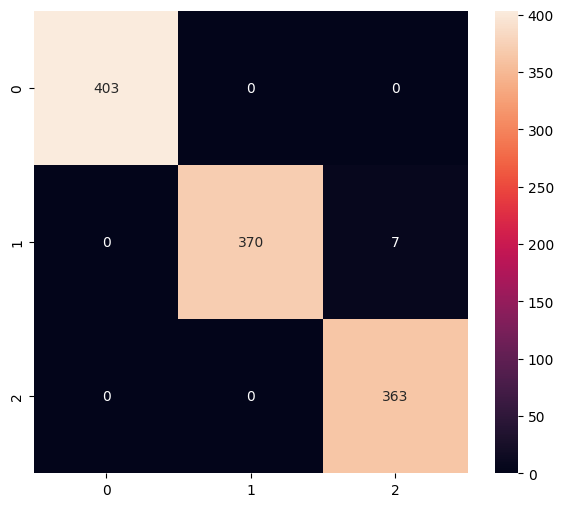

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      0.98      0.99       377
           2       0.98      1.00      0.99       363

    accuracy                           0.99      1143
   macro avg       0.99      0.99      0.99      1143
weighted avg       0.99      0.99      0.99      1143



In [17]:
!pip install pandas
!pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [18]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [19]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\PREDATOR\AppData\Local\Temp\tmpqg7inivo\assets


6500

In [20]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [21]:

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [22]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [23]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 998 µs


In [24]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.09473787 0.5787939  0.32646823]
1


In [25]:
## converting to tflite
prediction_classes=np.argmax(tflite_results,axis=1)

In [29]:
print("helo")


helo


In [27]:
interpreter=tf.lite.Interpreter(model_content=)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (3780555767.py, line 1)

In [ ]:
# Convert the model into TF Lite.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
